# Libraries

In [1]:
import pandas as pd
from pandas import get_dummies
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Data Exploration

In [2]:
data_cc = pd.read_csv('Bank Customer Churn Prediction.csv')
data_cc

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Explaining the Label: 

{0: 'not churned', 1: 'churned'}

1: Indicates the customer has churned (left the bank).

0: Indicates the customer has not churned (remained with the bank).

In [3]:
data_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
data_cc.churn.value_counts() #checking the dependent variable distribution 

churn
0    7963
1    2037
Name: count, dtype: int64

The churn rate is imbalanced. 
0 = did not churn 
1 = churned 

In [5]:
data_cc.describe(include='all')

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [6]:
data_cc.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
data_cc.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data_cc.index

RangeIndex(start=0, stop=10000, step=1)

In [9]:
data_cc.duplicated().sum()

0

## Data Cleaning

In [10]:
# Summarize zero values in columns
zero_values_summary = (data_cc == 0).sum()
zero_values_summary

customer_id            0
credit_score           0
country                0
gender                 0
age                    0
tenure               413
balance             3617
products_number        0
credit_card         2945
active_member       4849
estimated_salary       0
churn               7963
dtype: int64

In [11]:
# Check distribution of the target variable
## churn, used as the target. 1 if the client has left the bank during some period or 0 if he/she has not.
churn_distribution = data_cc['churn'].value_counts(normalize=True)
churn_distribution

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [12]:
data_cc_cleaned = data_cc.copy()

In [13]:
# Impute or investigate zero values in 'tenure'
# Replace 0 with the median tenure if required
median_tenure = data_cc_cleaned['tenure'].median()
median_tenure
data_cc_cleaned['tenure'] = data_cc_cleaned['tenure'].replace(0, median_tenure)

In [14]:
# Add a new column for zero balance
data_cc_cleaned['no_balance'] = (data_cc_cleaned['balance'] == 0).astype(int)

In [15]:
data_cc_cleaned

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,no_balance
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0


In [16]:
# Dropping irrelevant columns
data_cc_cleaned = data_cc_cleaned.drop(columns=['customer_id'])
data_cc_cleaned

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,no_balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0


In [17]:
# Display the shape and first few rows of the cleaned data
data_cc_cleaned.shape

(10000, 12)

In [18]:
data_cc_cleaned.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,no_balance
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0


# Label Encoding (One Hot Encoding)

In [19]:
# Identify categorical columns automatically
categorical_columns = data_cc_cleaned.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['country', 'gender'], dtype='object')

In [20]:
# Checking categorical columns
print(data_cc_cleaned.country.unique())
print(data_cc_cleaned.gender.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [21]:
# Apply one-hot encoding to categorical columns
data_cc_encoded = pd.get_dummies(data_cc_cleaned, drop_first=True)

# Display the first few rows of the transformed dataset
data_cc_encoded.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,no_balance,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,1,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,False,True,False


In [22]:
data_cc_encoded.shape

(10000, 13)

# Train/test and Oversampling
dataset split to 75/25 (train/test)

In [23]:
# Defining target features
target_column = 'churn'

In [24]:
# Splitting the features
X = data_cc_encoded.drop(columns=[target_column]) # features
y = data_cc_encoded[target_column] # label

In [25]:
X

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,no_balance,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,0,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,1,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,0,True,False,True


In [26]:
# Perform oversampling to raise 1's (minority class)
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.45, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [27]:
y_resampled.value_counts() #checking the value after oversampling

churn
0    7963
1    3583
Name: count, dtype: int64

In [28]:
# dataset split to 75/25 (train/test)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)


In [29]:
# Display the sizes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8659, 12), (2887, 12), (8659,), (2887,))

# ML Algorithm: Decision Tree

In [30]:
# Step 1: Initialize the base Decision Tree model
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
y_test_pred_base = base_model.predict(X_test)
y_test_pred_proba_base = base_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

print("Base Model Test Evaluation:")
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_base))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_base))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred_base))

Base Model Test Evaluation:
Test Accuracy: 0.7668860408728784

Test Confusion Matrix:
 [[1653  338]
 [ 335  561]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1991
           1       0.62      0.63      0.63       896

    accuracy                           0.77      2887
   macro avg       0.73      0.73      0.73      2887
weighted avg       0.77      0.77      0.77      2887



# Fine-Tuning

In [32]:
# Step 2: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [33]:
# Retrieve the best model from grid search
best_model = grid_search.best_estimator_
print("\nBest Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


## Evaluation

In [34]:
y_test_pred_best = best_model.predict(X_test)
y_test_pred_proba_best = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

print("\nFine-Tuned Model Test Evaluation (Customer Churn):")
print("Best Hyperparameters:", grid_search.best_params_)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_best))
print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_best))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred_best))


Fine-Tuned Model Test Evaluation (Customer Churn):
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Test Accuracy: 0.8195358503636994

Test Confusion Matrix:
 [[1789  202]
 [ 319  577]]

Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87      1991
           1       0.74      0.64      0.69       896

    accuracy                           0.82      2887
   macro avg       0.79      0.77      0.78      2887
weighted avg       0.82      0.82      0.82      2887



### Label Decoding

In [47]:
# Map 0 and 1 back to textual labels
label_mapping = {0: 'not churned', 1: 'churned'}
y_test_pred_text = [label_mapping[pred] for pred in y_test_pred_best]

In [48]:
# Convert the list to a pandas Series to use .value_counts()
y_test_pred_text_series = pd.Series(y_test_pred_text)

print(y_test_pred_text[:10])

# Display the count of each category
print(y_test_pred_text_series.value_counts())

['not churned', 'not churned', 'not churned', 'not churned', 'not churned', 'churned', 'not churned', 'not churned', 'not churned', 'churned']
not churned    2108
churned         779
Name: count, dtype: int64


### Prediction Insight
As per the predictive model, 2108 customers have stayed with the bank (not churned) while 779 customer have left the bank (churned)

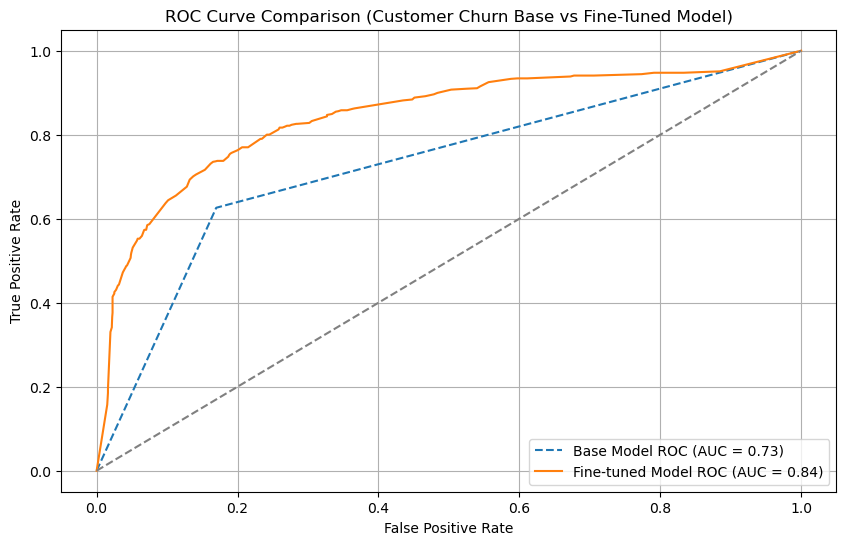

In [36]:
# Compare ROC Curves for Base Model and Fine-Tuned Model
fpr_base, tpr_base, _ = roc_curve(y_test, y_test_pred_proba_base)
roc_auc_base = auc(fpr_base, tpr_base)

fpr_best, tpr_best, _ = roc_curve(y_test, y_test_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure(figsize=(10, 6))
plt.plot(fpr_base, tpr_base, label=f'Base Model ROC (AUC = {roc_auc_base:.2f})', linestyle='--')
plt.plot(fpr_best, tpr_best, label=f'Fine-tuned Model ROC (AUC = {roc_auc_best:.2f})', linestyle='-')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guessing line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Customer Churn Base vs Fine-Tuned Model)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

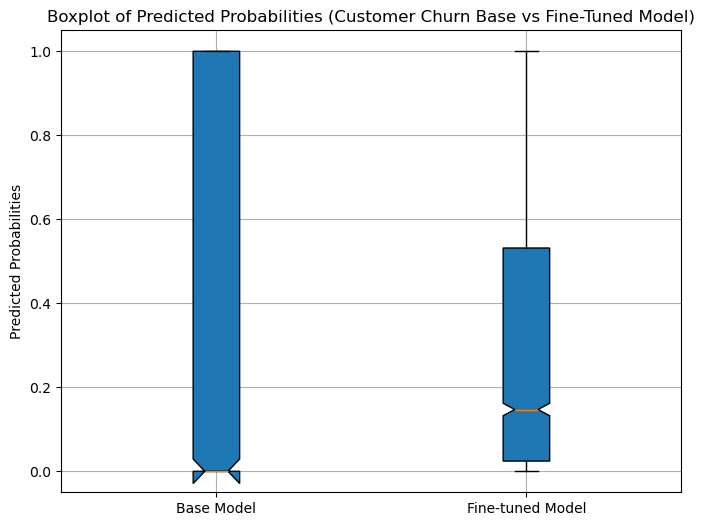

In [37]:
# Visualize Predicted Probabilities with Boxplots
data = [y_test_pred_proba_base, y_test_pred_proba_best]

plt.figure(figsize=(8, 6))
plt.boxplot(data, labels=['Base Model', 'Fine-tuned Model'], patch_artist=True, notch=True)
plt.ylabel('Predicted Probabilities')
plt.title('Boxplot of Predicted Probabilities (Customer Churn Base vs Fine-Tuned Model)')
plt.grid()
plt.show()

The boxplot for the fine-tuned model demonstrates a significant improvement in prediction consistency compared to the base model. The interquartile range (IQR) is much narrower, indicating that the majority of predicted probabilities (25th to 75th percentiles) are tightly clustered. The median line, positioned closer to the lower end of the box, suggests that a large portion of predictions are skewed toward probabilities near 0, reflecting the model’s confidence in identifying the majority class (“No Churn”). The whiskers are shorter, showing that extreme probabilities (close to 0 or 1) are more balanced and less variable. While a few outliers exist, their reduced prominence highlights the model’s enhanced stability after hyperparameter tuning. This improvement aligns with the model’s higher performance metrics, such as F1-score and ROC AUC, indicating better overall generalization.

The ROC curve comparison shows that the fine-tuned model significantly outperforms the base model, with a higher AUC (0.84 vs. 0.73), indicating improved ability to distinguish between churn and non-churn classes. The fine-tuned model has a more favorable trade-off between sensitivity (true positive rate) and specificity (false positive rate) compared to the base model.

The boxplot of predicted probabilities illustrates that the fine-tuned model has a narrower and more evenly distributed range of predicted probabilities, indicating more confident and consistent predictions. In contrast, the base model exhibits extreme variability, with many predictions near 0 or 1, reflecting less stability and reliability in its output.

Based on the results, the null hypothesis, which stated that there is no significant difference in the predictive performance between the base and fine-tuned decision tree models, is rejected. The fine-tuned model outperforms the base model with improved accuracy (82% vs. 77%) and F1-score (0.69 vs. 0.63 for Class 1), indicating that hyperparameter tuning significantly enhances the model’s performance for customer churn prediction.

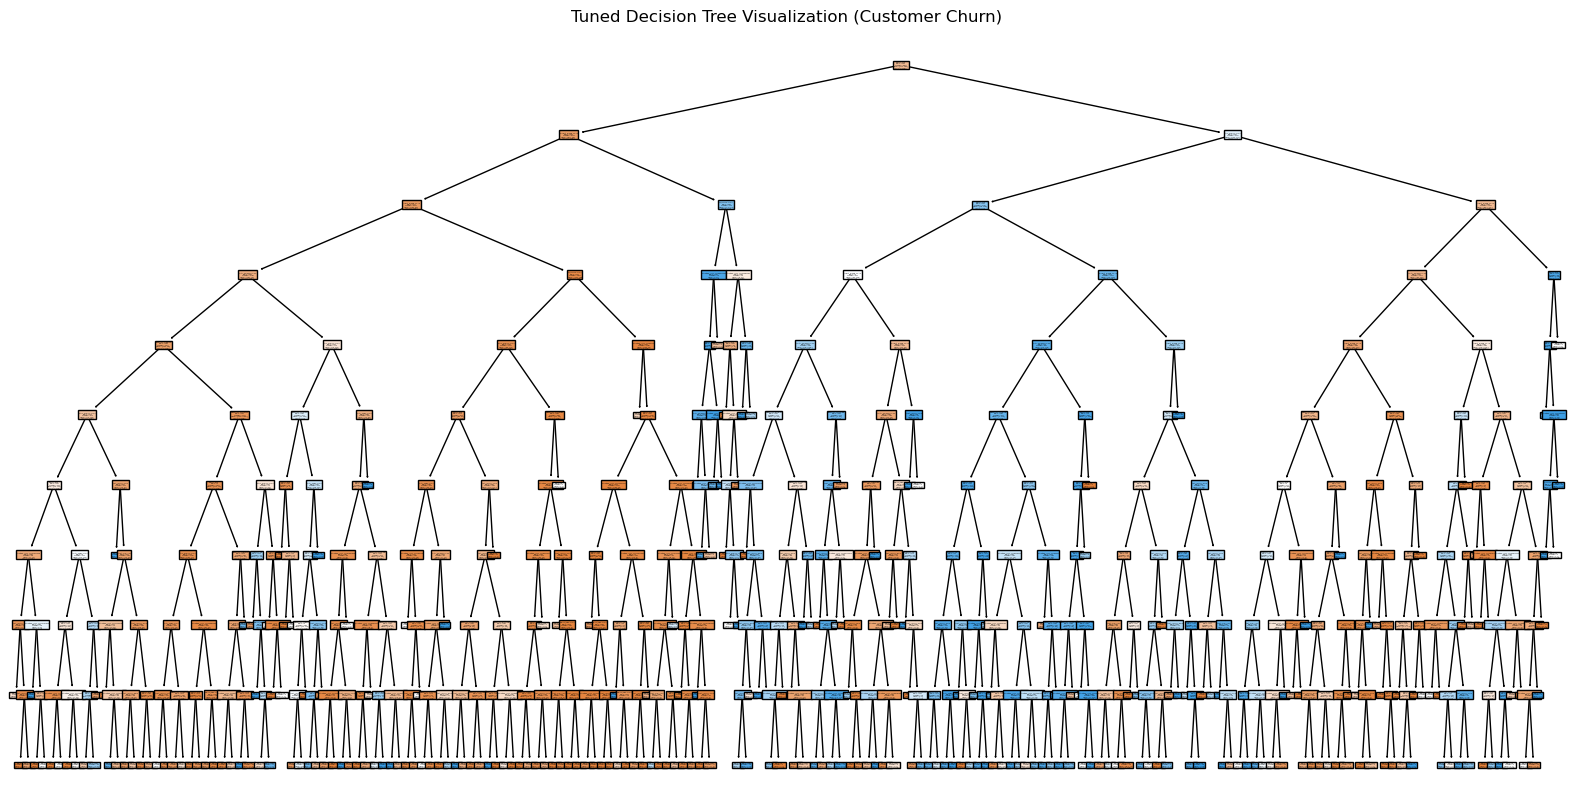

In [38]:
# Visualize the final tuned Decision Tree
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, feature_names=X_train.columns, class_names=['No Churn', 'Churn'], filled=True)
plt.title("Tuned Decision Tree Visualization (Customer Churn)")
plt.show()

## Overall Observations

Strengths:
	•	Improved precision for churn predictions reduces false positives.
	•	High recall for non-churn cases ensures fewer false negatives for Class 0.

Weaknesses:
	•	Recall for churn cases decreased slightly after tuning, indicating room for further improvement in identifying true churn cases.
